## Import Libraries

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from tensorflow.keras.activations import softmax
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np
#please import any required libraries

In [2]:
# data is in "data" folder, contains 9 classes. Please build an image classification model to classify images.

## Read and Analyse the Data

In [3]:
#please analyse the data and figure if data requires any pre-processing or augmentation.

In [4]:
base_dir=r"C:\Users\91924\Desktop\machine_learning_practice\NUNC systems assignment\Sr.DS_Assgn\Sr.DS Assgn\data"

## Splitting Data

In [5]:
## Split data 80% training, 10% Validation, 10% testing

In [6]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)


## Define Generator

In [7]:
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 4050 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


## Define Model

In [8]:
# add Fully connected last layers( as many as you like to improve the performance), 
#try-out drop-out in Fully connected layers if you think it is necessary
#  Building the CNN
# Initialising the CNN
cnn=tf.keras.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection,Output Layer
cnn.add(tf.keras.layers.Dense(9,activation='softmax'))

## Compiling Model

In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

## Training

In [10]:
r=cnn.fit(train_datagen,epochs=25,validation_data=test_datagen)

Epoch 1/25
64/64 [==============================] - 111s 2s/step - loss: 2.1452 - accuracy: 0.1615 - val_loss: 1.9798 - val_accuracy: 0.2467
Epoch 2/25
64/64 [==============================] - 116s 2s/step - loss: 1.6879 - accuracy: 0.3632 - val_loss: 1.5183 - val_accuracy: 0.4378
Epoch 3/25
64/64 [==============================] - 119s 2s/step - loss: 1.3319 - accuracy: 0.5020 - val_loss: 1.3171 - val_accuracy: 0.4778
Epoch 4/25
64/64 [==============================] - 115s 2s/step - loss: 1.1306 - accuracy: 0.5736 - val_loss: 1.3051 - val_accuracy: 0.5133
Epoch 5/25
64/64 [==============================] - 116s 2s/step - loss: 0.9766 - accuracy: 0.6215 - val_loss: 1.0046 - val_accuracy: 0.6156
Epoch 6/25
64/64 [==============================] - 116s 2s/step - loss: 0.8935 - accuracy: 0.6489 - val_loss: 0.9880 - val_accuracy: 0.5889
Epoch 7/25
64/64 [==============================] - 116s 2s/step - loss: 0.8173 - accuracy: 0.6753 - val_loss: 0.9290 - val_accuracy: 0.6089
Epoch 8/25
64

## Testing

In [18]:
##add Code Here to preprocess image before testing
# Pick the best model weights for testing and test it on few images
# saving it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_car.h5')

In [19]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_car.h5')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

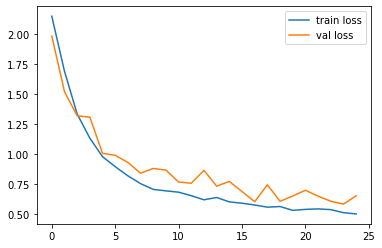

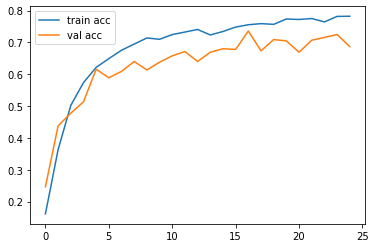

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Improving Model

#Please add your thoughts on way to improve the model.
1.we can add drop out layer
2.we can add more hidder layers,epchos,iterations
3.we can change image size
4.we can use transfer learning
5.we can increase data
